In [1]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
from numpy import geomspace
import math
import matplotlib
from cycler import cycler
matplotlib.rcParams['axes.prop_cycle'] = cycler(color='brgmcyk')

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

Welcome to JupyROOT 6.14/04
../InputData/zT_Rebin_8_006zT06zTOldBinNewNewPurity8dPhi/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_8_006zT06zTOldBinNewNewPurity8dPhi/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_8_006zT06zTOldBinNewNewPurity8dPhi/pPb_SE_L0_Correlation_GMB_Ratio.root
../InputData/zT_Rebin_8_006zT06zTOldBinNewNewPurity8dPhi/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_8_006zT06zTOldBinNewNewPurity8dPhi/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_8_006zT06zTOldBinNewNewPurity8dPhi/pPb_SE_L0_Correlation_GMB_Ratio.root


In [2]:
x = np.array([0.01, 0.09, 0.04, 0.16, 1, 1, 2, 2])
# reshaping the array to a 2D array, and summing over the columns
x.reshape((x.shape[0]/2,2)).sum(axis=1)

array([0.1, 0.2, 2. , 4. ])

In [3]:
print dPhi_Bins[ZYAM_Min_i]
print dPhi_Bins[ZYAM_Max_i]

0.392699081699
1.57079632679


**root to numpy**

In [4]:
Corrs = ROOT_to_nparray()
#print(Corrs["p-Pb_Uncorr_Estimate"][0][1])
#Plot_UB_Subtraction(Corrs)
#print_from_Dict(Corrs)

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

In [5]:
reload(functions_correlations)
import functions_correlations
from functions_correlations import *

In [6]:
#Plot_Sub_UB_Overlay(Corrs)

In [7]:
Correlated_Subtraction_Weights(Corrs)
#print_from_Dict(Corrs)

In [8]:
#Plot_UB()

**Pedestal Subtraction**

In [9]:
#print_from_Dict(Corrs)
#print(Corrs["pp_CSR"][0])
Plot = False
if Plot:
    for ipt in range(N_pT_Bins):
        for izt in range(NzT):
            fig = plt.figure(figsize=(8,7))
            #Cs_Correlations_Unsub_Overlay(delta_phi_centers, Corrs["pp_CSR"][0][izt],  Corrs["pp_CSR_Errors"][0][izt],UE_binmin=2, UE_binmax=9,label='data',color='black')
            GetRatio(Corrs["pp_CSR"][0][izt],Corrs["pp_CSR_Errors"][0][izt],Corrs["p-Pb_CSR"][0][izt],Corrs["p-Pb_CSR_Errors"][0][izt],delta_phi_centers)
            plt.annotate(r'%1.2f < $z_\mathrm{T}$ < %1.2f'%(zTbins[izt],zTbins[izt+1]), xy=(0.99, 0.01), xycoords='axes fraction', ha='right', va='bottom', fontsize=16)

            plt.savefig('pics/%s/%s/Befor_After_UE_pp-pPb_pT_%i_zT_%i.pdf'%(Shower,description_string,ipt,izt))

In [10]:
Ped_Sub_After_Cs(Corrs)

/Users/fernando/Library/Python/2.7/lib/python/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


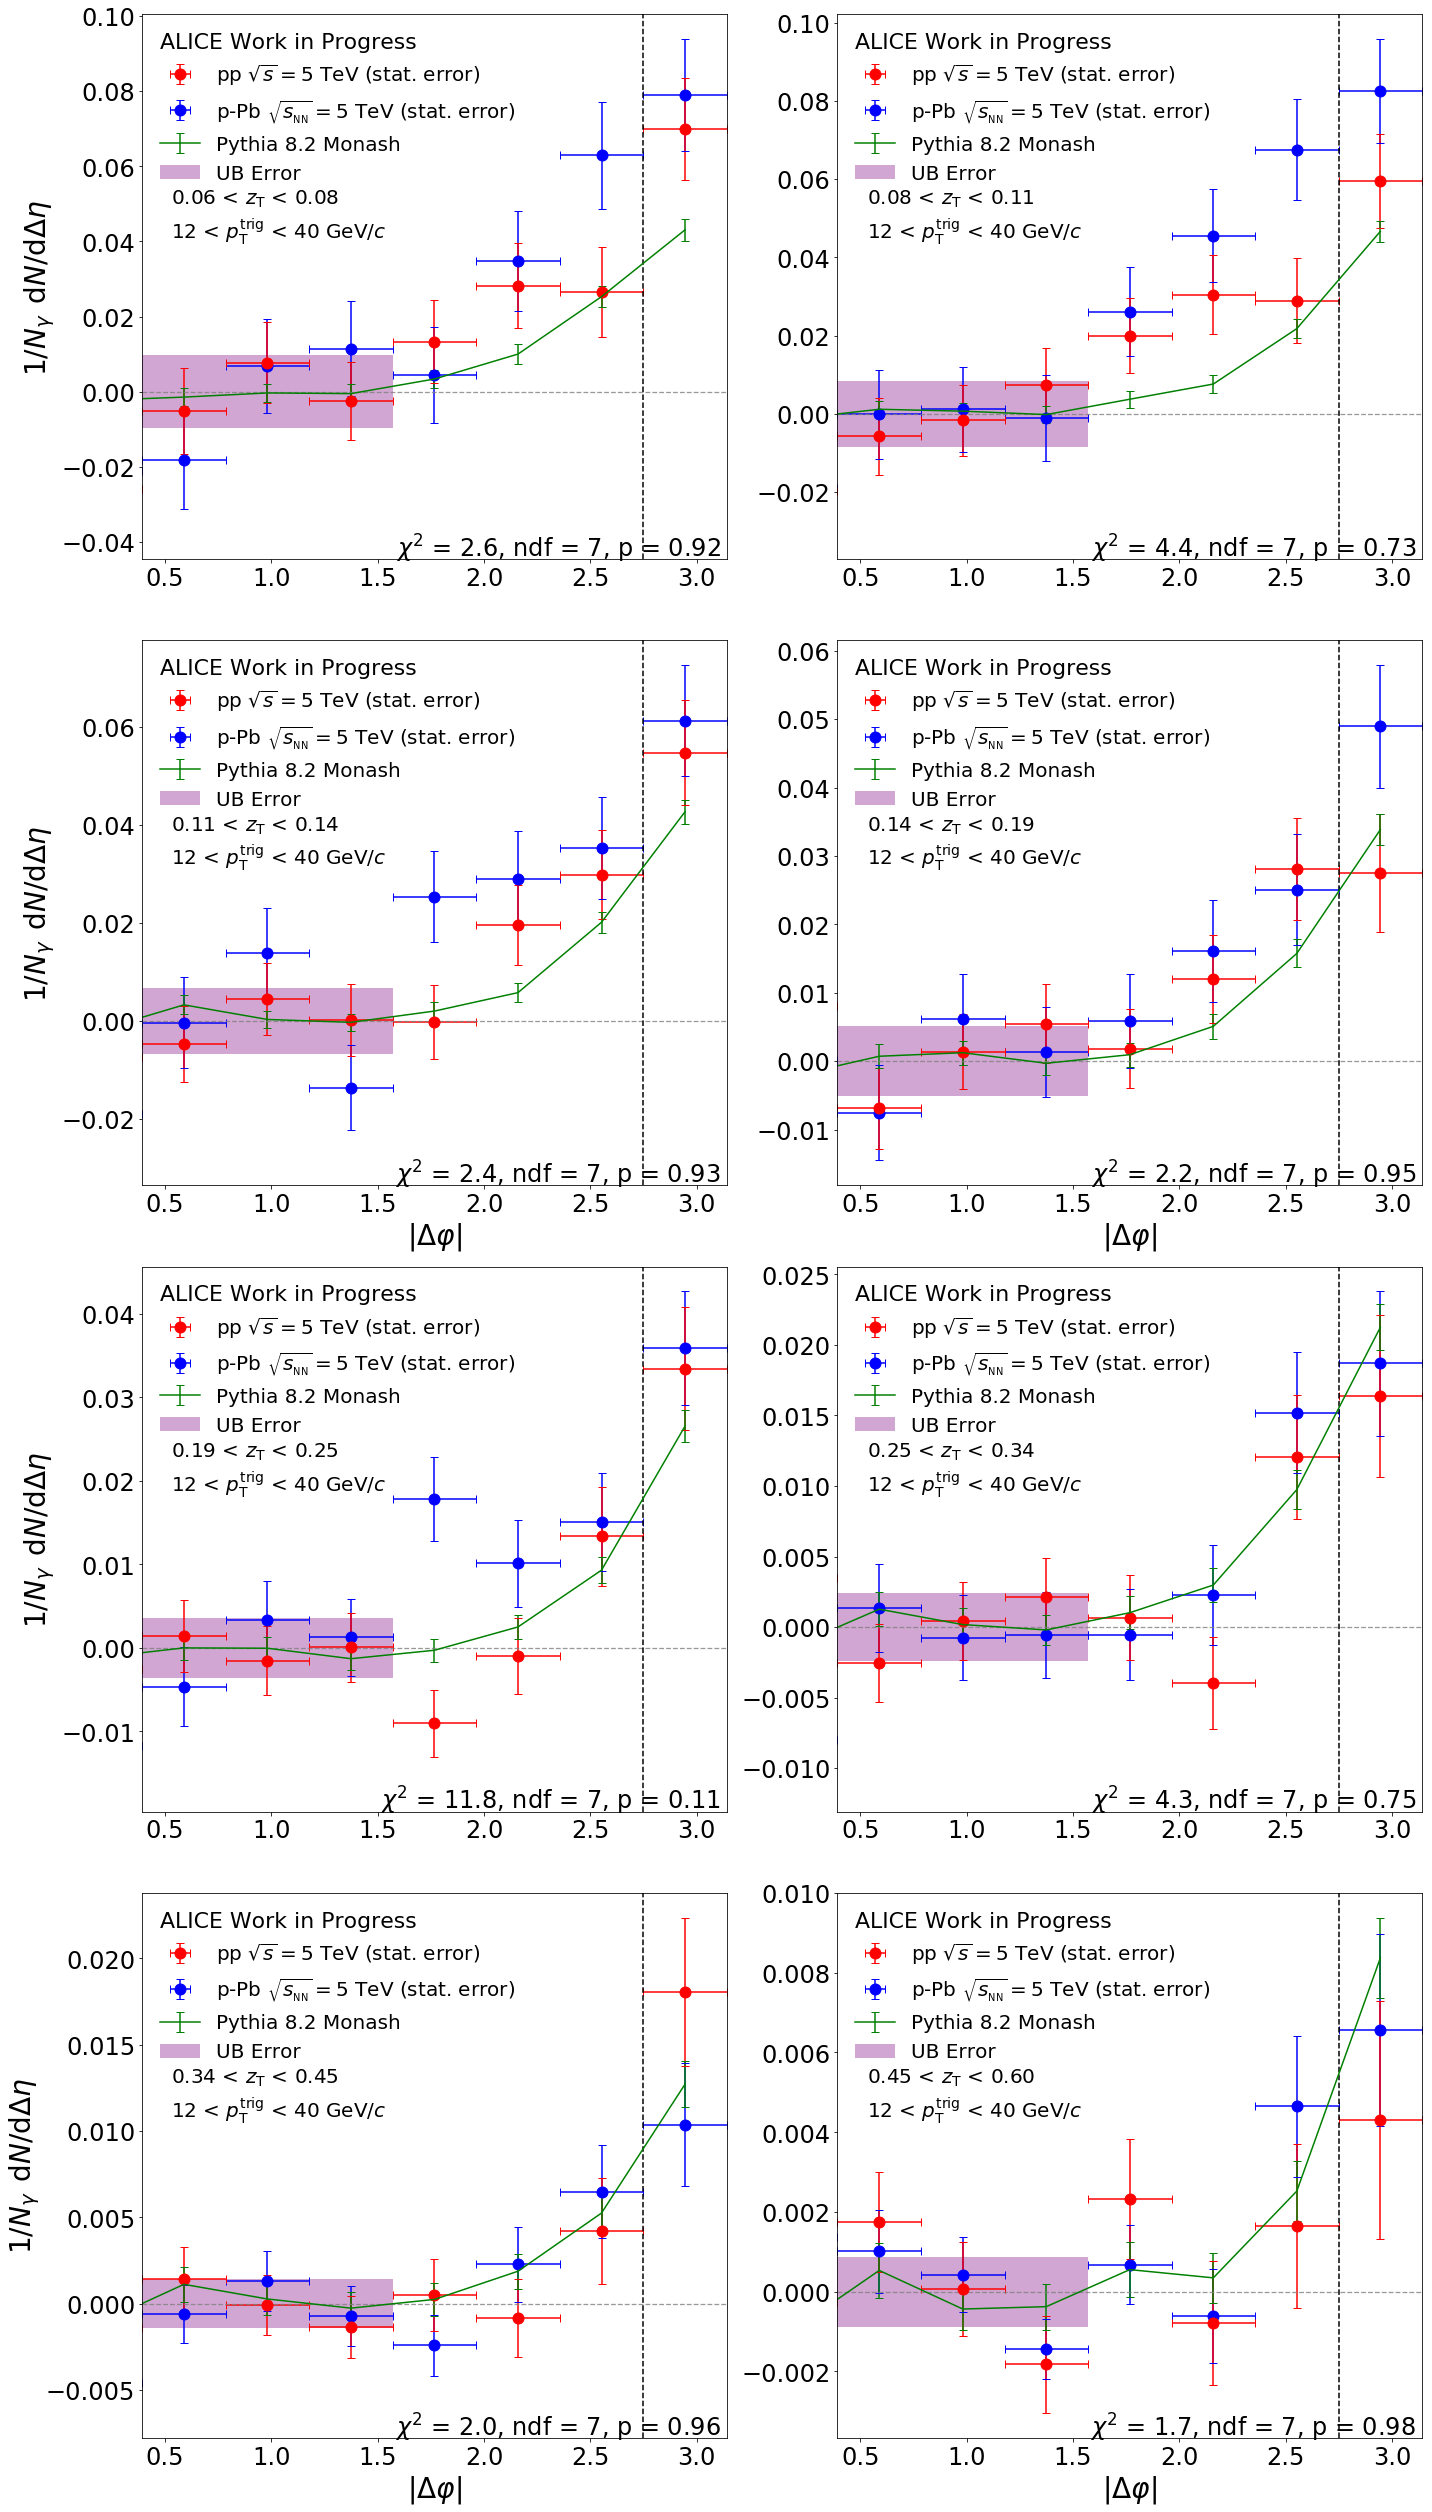

In [11]:
Plot_pp_pPb_Cs(Corrs)
#Plot_pp_pPb_Cs_Individual(Corrs)
#Compare_Cs_pTBins()

**Debugging**

In [12]:
print("Number of Away side bins = %i"%(N_Phi_Integrate))

print(Corrs['pp_CSR'][0][3])

for SYS in Systems:
    print(SYS)
    vals = Corrs['%s_CSR'%(SYS)][0][3][-N_Phi_Integrate:] #2nd zT bin
    Integral = np.sum(vals)/(dPhi_Width*N_Phi_Integrate)

    val_errors = Corrs['%s_CSR_Errors'%(SYS)][0][3][-N_Phi_Integrate:]
    Integral_Err = math.sqrt(np.sum(val_errors**2))/(dPhi_Width*N_Phi_Integrate)

    UE_Error = Corrs['%s_Uncorr_Error'%(SYS)][0][3][1]/(dPhi_Width*(ZYAM_Max_i-ZYAM_Min_i)) #is a scalar

    print("%f +\- %f +\- %f"%(Integral,Integral_Err,UE_Error))
    Total_Err = math.sqrt(Integral_Err**2 + UE_Error**2)
    print(Total_Err/Integral)
    
    print("non-dphi rate %1.3f"%(Corrs['%s_Uncorr_Error'%(SYS)][0][3][1]))

Number of Away side bins = 1
[ 0.00811324 -0.00685428  0.00138943  0.00546485  0.00180387  0.01206562
  0.02810016  0.02745708]
pp
0.069919 +\- 0.021996 +\- 0.008430
0.33690489405831764
non-dphi rate 0.010
p-Pb
0.124587 +\- 0.022871 +\- 0.009917
0.20009066674032833
non-dphi rate 0.012


**Average Cs**: $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ in each $z_\mathrm{T}$ bin (i)

In [13]:
Avg_Corr = Cs_Weighted_Average(Corrs)
#Plot_pp_pPb_Cs(Avg_Corr)
#Plot_pp_pPb_Cs_Individual(Avg_Corr)

In [14]:
Frags = Get_Fragmentation(Corrs)
#print(Frags["pp_FF_Errors"][0])
#print(Frags["pp_purity_FF_Errors"])
#for i in range(len(Frags["pp_FF"][0])):
#    print("%f"%(Frags["pp_FF_Errors"][0][i]/Frags["pp_FF"][0][i])),

In [15]:
reload(functions_fragmentation)
from functions_fragmentation import *

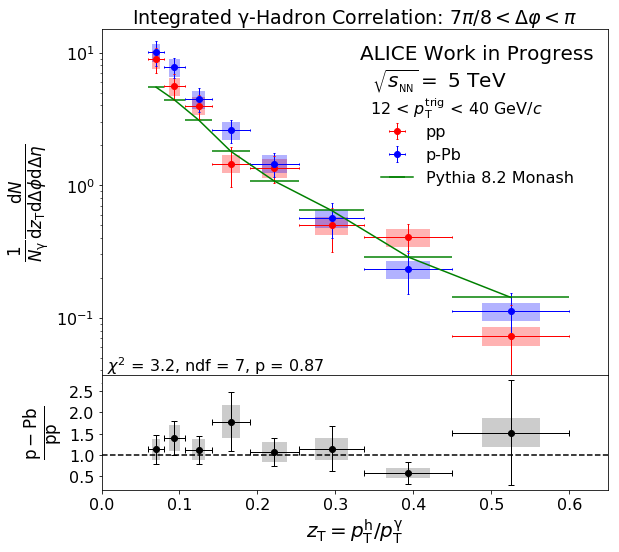

pp_purity_FF_Errors:
1.3120, 0.8254, 0.5868, 0.2146, 0.1993, 0.0732, 0.0599, 0.0108, 

p-Pb_FF_Errors:
2.1202, 1.3992, 0.9073, 0.5193, 0.2971, 0.1640, 0.0834, 0.0421, 

pp_FF:
8.9043, 5.6019, 3.9824, 1.4566, 1.3524, 0.4965, 0.4068, 0.0730, 

pp_FF_Errors:
1.9062, 1.2457, 0.8356, 0.4908, 0.3117, 0.1811, 0.1000, 0.0521, 

p-Pb_FF:
10.0525, 7.7810, 4.4553, 2.5956, 1.4503, 0.5665, 0.2334, 0.1115, 

p-Pb_purity_FF_Errors:
1.4812, 1.1465, 0.6565, 0.3824, 0.2137, 0.0835, 0.0344, 0.0164, 

zT Centers:
0.07, 0.09, 0.12, 0.17, 0.22, 0.30, 0.39, 0.53, 
zT Widths:
0.0100, 0.0135, 0.0175, 0.0240, 0.0315, 0.0420, 0.0565, 0.0750,


In [16]:
Combined_Frags = Average_FF(Frags)
#Plot_pp_pPb_Avg_FF(Combined_Frags)

Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)
print_from_Dict(Frags)
print("zT Centers:")
for izt in zT_centers:
    print("%1.2f,"%(izt)),
print("")
    
print("zT Widths:")
for izt in zT_widths:
    print("%1.4f,"%(izt)),

#Frags_Avg_Cs = Get_Fragmentation(Avg_Corr,True)
#print_from_Dict(Frags_Avg_Cs)
#Plot_pp_pPb_Avg_FF_and_Ratio(Frags_Avg_Cs)

zT_Rebin_8_006zT06zTOldBinNewNewPurity8dPhi Intg. 7\pi/8  & $2.08 \pm 0.13$ & 1.12  & $2.22 \pm 0.10$ & 1.19  & $3.20/7\ 0.87 $\\


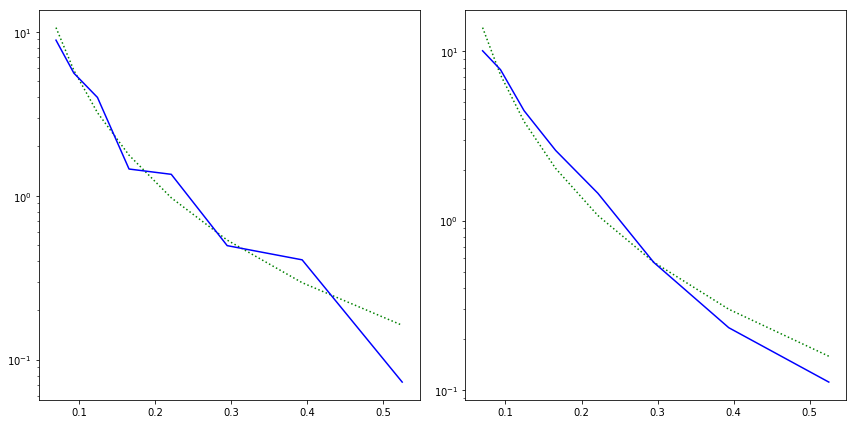

In [17]:
LaTeX_Table(Combined_Frags)

[0.26166598 0.21738498 0.17808858 0.14780742 0.13285592 0.13829871
 0.16209424 0.19772387 0.2399731  0.2859224  0.33404839 0.38353254
 0.43391043 0.48490359 0.53633655 0.58809393 0.64009704 0.69229051
 0.7446343  0.79709881]
1.02315300744


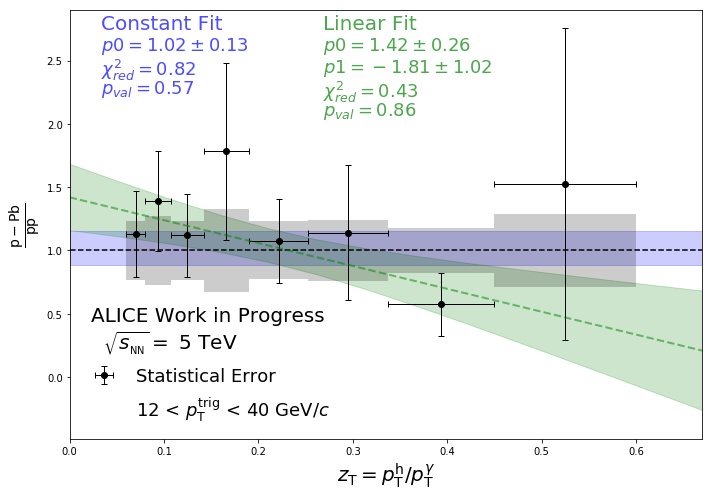

                Central Values:
[1.12895518 1.3889766  1.11876331 1.78187696 1.07238377 1.14099513
 0.57376139 1.52617885]

                Satistical Uncertainty Absolute:
[0.33927453 0.39722255 0.3271257  0.69821657 0.33069052 0.53136872
 0.24876328 1.23155366]

               Relative Satistical Uncertainty:
[0.30052082 0.28598218 0.29239938 0.39184331 0.30836957 0.46570639
 0.43356573 0.80695238]

                Ratio Uncertainty from Purity:
[0.22222065 0.25218329 0.22109875 0.30107197 0.21605164 0.22355173
 0.16987644 0.26884936]

                Ratio Uncertainty from Single Track Efficiency:
[0.07982919 0.09821548 0.07910851 0.12599773 0.07582898 0.08068054
 0.04057106 0.10791714]

                Full Systematic Uncertainty:
[0.23612437 0.27063387 0.23482507 0.32637365 0.22897237 0.23766515
 0.17465399 0.2897    ]

****************************************
Minimizer is Linear
Chi2                      =      5.71077
NDf                       =            7
p0                  

In [18]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
#pp_pPB_Avg_Ratio(Frags_Avg_Cs,0)

### Compare Different Integrations

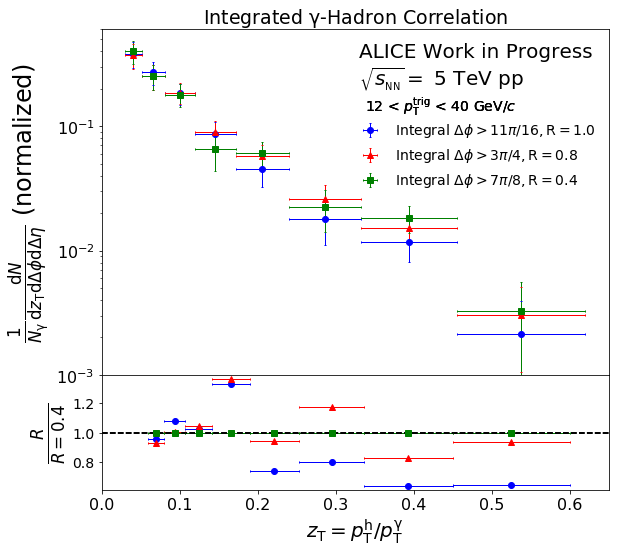

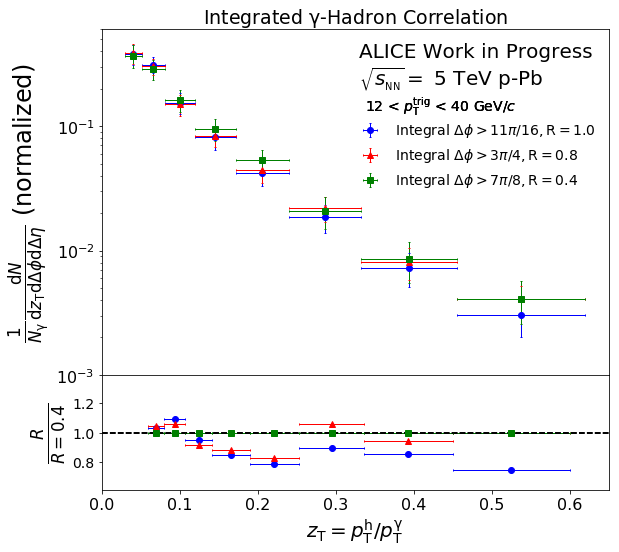

In [19]:
#ranges = (1.9,2.15,2.7,2.9)
ranges = (1.9,2.15,2.7)
strings = ("11\pi/16, \mathrm{R} = 1.0","3\pi/4,\mathrm{R} = 0.8","7\pi/8, \mathrm{R} = 0.4","15\pi/16, \mathrm{R} = 0.2")

Compare_FF_Integration(ranges,strings)

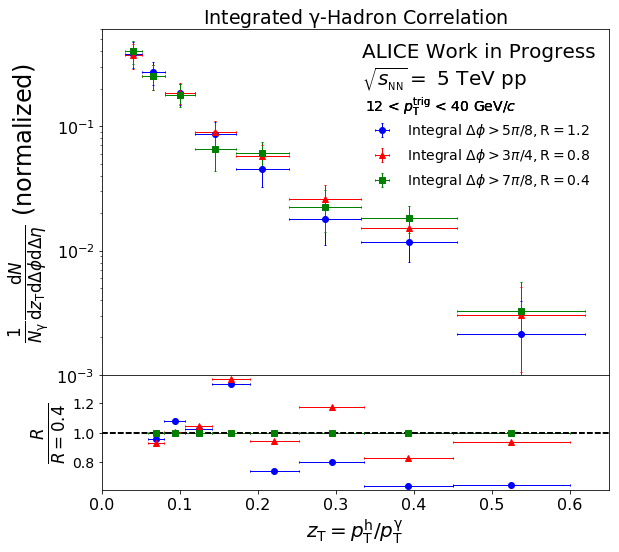

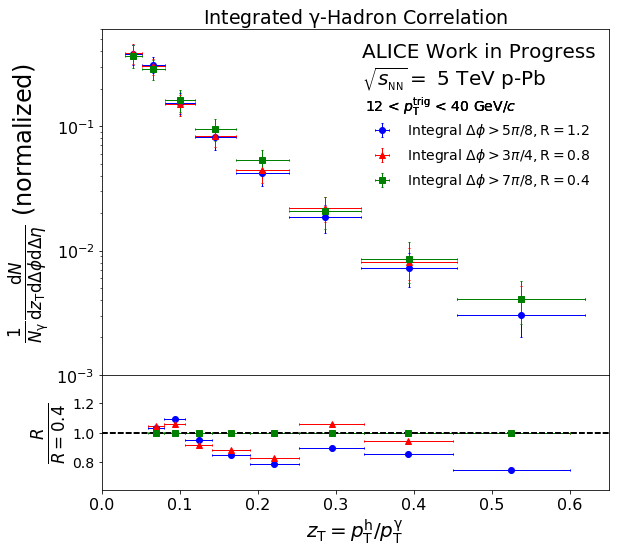

In [20]:
ranges = (1.9,2.3,2.7)
strings = ("5\pi/8, \mathrm{R} = 1.2","3\pi/4,\mathrm{R} = 0.8","7\pi/8, \mathrm{R} = 0.4")

Compare_FF_Integration(ranges,strings)

In [21]:
reload(functions_fragmentation)
from functions_fragmentation import *

zT_Rebin_8_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
zT_Rebin_8_006zT06zT_Small_Zyam_Avg
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT_Small_Zyam_Avg.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT_Small_Zyam_Avg.npy


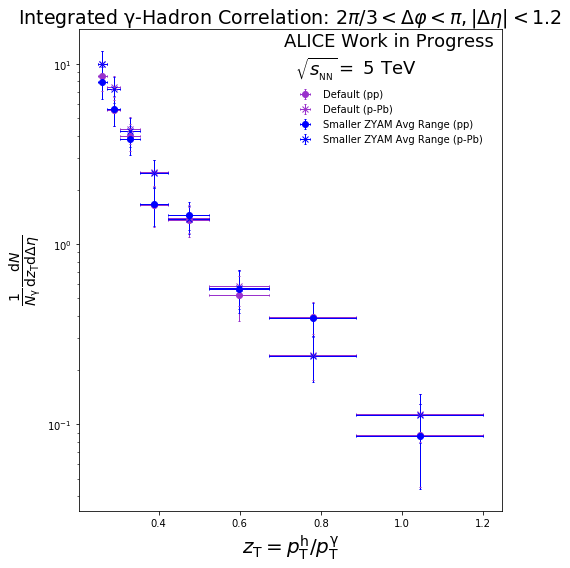

                Central Values:


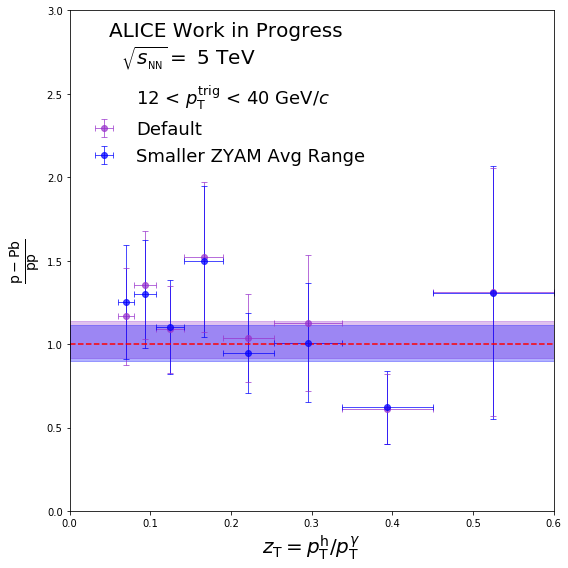

                Central Values:
[1.25447735 1.30212027 1.10274259 1.4968685  0.9471799  1.00968907
 0.62082376 1.30841238]

****************************************
Minimizer is Linear
Chi2                      =      6.60779
NDf                       =            7
p0                        =      1.02796   +/-   0.10807     

****************************************
Minimizer is Linear
Chi2                      =      5.93842
NDf                       =            7
p0                        =      1.00803   +/-   0.109698    


In [22]:
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zT_Small_Zyam_Avg"]
string_descriptions = ["Default","Smaller ZYAM Avg Range","9 zT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

zT_Rebin_8_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
zT_Rebin_8_006zT06zTOldBinNewNewPurity
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTOldBinNewNewPurity.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTOldBinNewNewPurity.npy


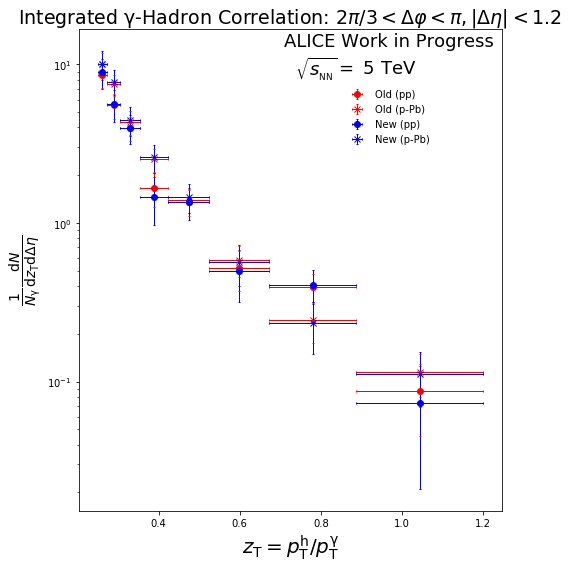

                Central Values:


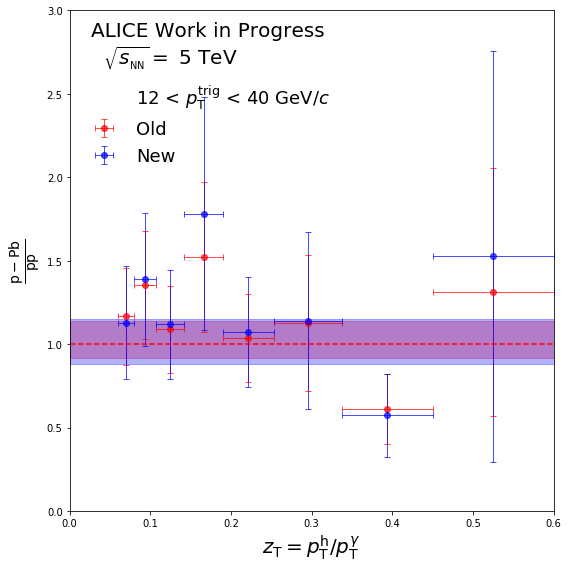

                Central Values:
[1.12895518 1.3889766  1.11876331 1.78187696 1.07238377 1.14099513
 0.57376139 1.52617885]

****************************************
Minimizer is Linear
Chi2                      =      6.60779
NDf                       =            7
p0                        =      1.02796   +/-   0.10807     

****************************************
Minimizer is Linear
Chi2                      =      5.71077
NDf                       =            7
p0                        =      1.01644   +/-   0.133719    


In [23]:
strings = ["zT_Rebin_7_006zT06zT","zT_Rebin_8_006zT06zT","zT_Rebin_9_006zT06zT"]
string_descriptions = ["7 zT Bins","8 zT Bins","9 zT Bins","4 pT Bins"]

strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTOldBinNewNewPurity"]
string_descriptions = ["Old","New"]

colors = ["red","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

## Compare Different pT Binning

In [24]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE"]
string_descriptions = ["1 pT Bins","2 pT Bins","3 pT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
#Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,True)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

[0.26166598 0.21738498 0.17808858 0.14780742 0.13285592 0.13829871
 0.16209424 0.19772387 0.2399731  0.2859224  0.33404839 0.38353254
 0.43391043 0.48490359 0.53633655 0.58809393 0.64009704 0.69229051
 0.7446343  0.79709881]
1.02315300744


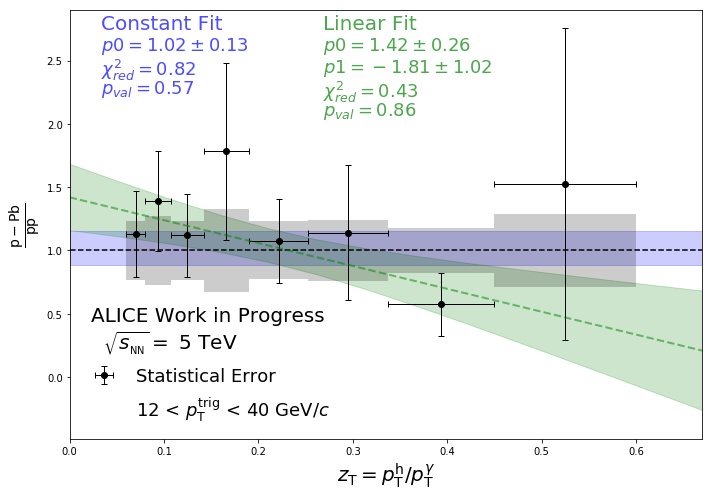

                Central Values:
[1.12895518 1.3889766  1.11876331 1.78187696 1.07238377 1.14099513
 0.57376139 1.52617885]

                Satistical Uncertainty Absolute:
[0.33927453 0.39722255 0.3271257  0.69821657 0.33069052 0.53136872
 0.24876328 1.23155366]

               Relative Satistical Uncertainty:
[0.30052082 0.28598218 0.29239938 0.39184331 0.30836957 0.46570639
 0.43356573 0.80695238]

                Ratio Uncertainty from Purity:
[0.22222065 0.25218329 0.22109875 0.30107197 0.21605164 0.22355173
 0.16987644 0.26884936]

                Ratio Uncertainty from Single Track Efficiency:
[0.07982919 0.09821548 0.07910851 0.12599773 0.07582898 0.08068054
 0.04057106 0.10791714]

                Full Systematic Uncertainty:
[0.23612437 0.27063387 0.23482507 0.32637365 0.22897237 0.23766515
 0.17465399 0.2897    ]

****************************************
Minimizer is Linear
Chi2                      =      5.71077
NDf                       =            7
p0                  

In [25]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

zT_Rebin_8_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
zT_Rebin_8_006zT06zTpT2
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTpT2.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTpT2.npy


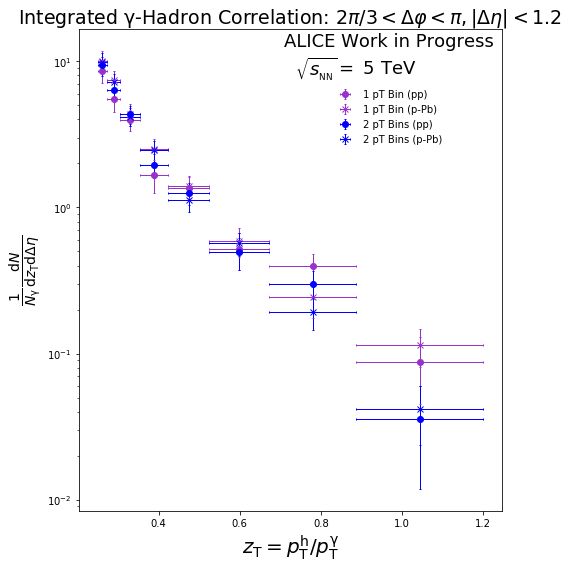

                Central Values:


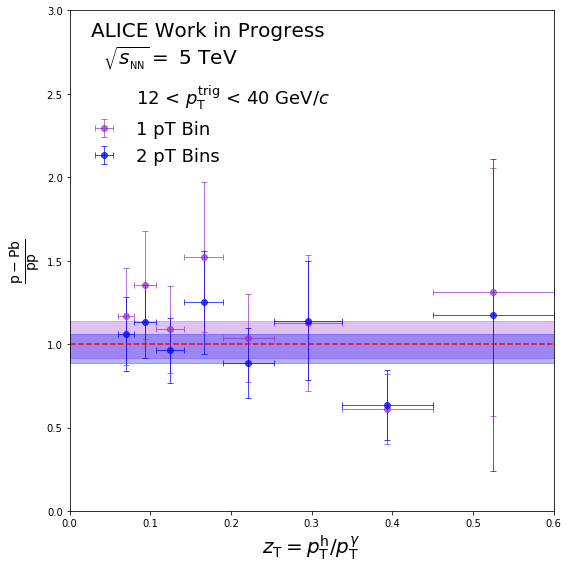

                Central Values:
[1.06243623 1.13544309 0.96307152 1.25018322 0.88824074 1.14142689
 0.6374398  1.17328836]

****************************************
Minimizer is Linear
Chi2                      =      6.60779
NDf                       =            7
p0                        =      1.02796   +/-   0.10807     

****************************************
Minimizer is Linear
Chi2                      =      4.50402
NDf                       =            7
p0                        =     0.972113   +/-   0.0870242   


In [26]:
reload(functions_fragmentation)
from functions_fragmentation import *
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTpT2"]
string_descriptions = ["1 pT Bin","2 pT Bins"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

pT_Rebin_1_pDevNONE
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevNONE.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevNONE.npy
pT_Rebin_1_pDevPlus
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevPlus.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevPlus.npy
pT_Rebin_1_pDevMinus
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevMinus.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevMinus.npy
pT_Rebin_1_90p
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_90p.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_90p.npy


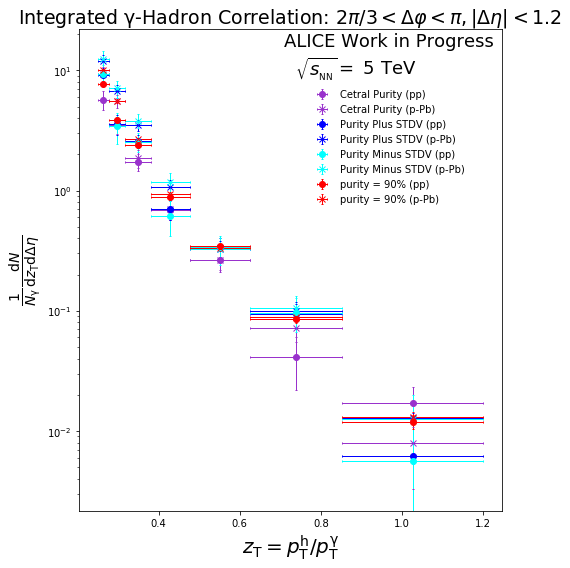

                Central Values:


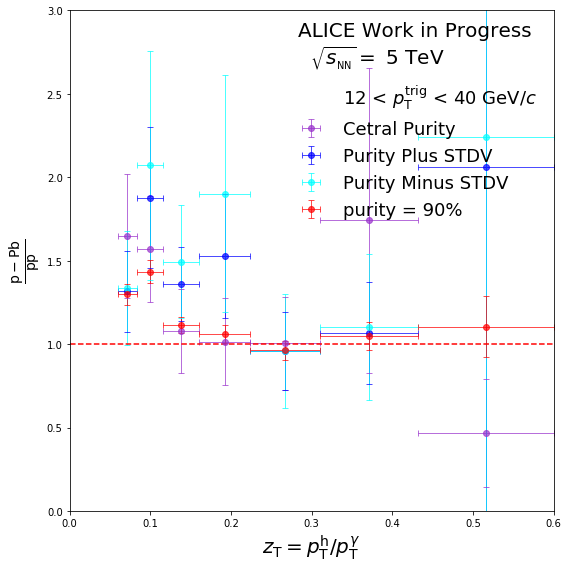

                Central Values:
[1.29867451 1.43467071 1.11537355 1.0607137  0.96336133 1.04910989
 1.10430099]

****************************************
Minimizer is Linear
Chi2                      =      8.87214
NDf                       =            6
p0                        =      1.10897   +/-   0.117923    

****************************************
Minimizer is Linear
Chi2                      =      5.03376
NDf                       =            6
p0                        =      1.27169   +/-   0.112121    

****************************************
Minimizer is Linear
Chi2                      =       3.5561
NDf                       =            6
p0                        =      1.32588   +/-   0.168016    

****************************************
Minimizer is Linear
Chi2                      =      37.1655
NDf                       =            6
p0                        =      1.13933   +/-   0.0242047   


In [27]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_1_pDevPlus","pT_Rebin_1_pDevMinus","pT_Rebin_1_90p"]
string_descriptions = ["Cetral Purity","Purity Plus STDV","Purity Minus STDV","purity = 90%"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,False)